In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Full_Data_Final.csv')

In [4]:
df.head()

,confirmed,deaths,recovered,month,day
0,0.0,0.0,0.0,1,22
1,0.0,0.0,0.0,1,23
2,0.0,0.0,0.0,1,24
3,0.0,0.0,0.0,1,25
4,0.0,0.0,0.0,1,26


In [5]:
df[df<0].sum()

confirmed    0.0
deaths       0.0
recovered    0.0
month        0.0
day          0.0
dtype: float64

In [6]:
df.isnull().sum()

confirmed    0
deaths       0
recovered    0
month        0
day          0
dtype: int64

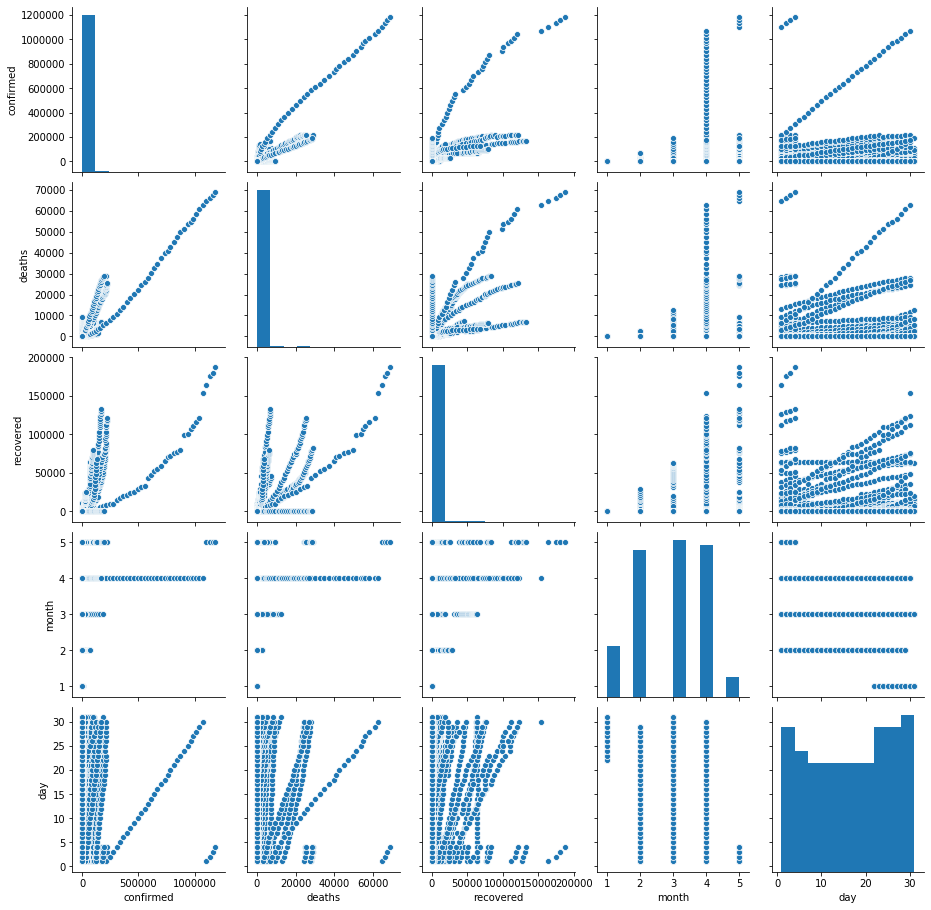

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [28]:
df_train = df[df['month'] != 4]
df_train = df_train.append(df[df['month']==4][:len(df[df['month']==4])-1000])
df_train = df_train[df_train['month'] != 5]
df_valid = df[df['month'] == 4][-1000:]
df_test = df[df['month'] == 5]
len(df_train), len(df_valid), len(df_test), len(df)

(24000, 1000, 1000, 26000)

In [27]:
df[df['month'] == 5]

,confirmed,deaths,recovered,month,day
100,2335.0,68.0,310.0,5,1
101,2469.0,72.0,331.0,5,2
102,2704.0,85.0,345.0,5,3
103,2894.0,90.0,397.0,5,4
204,782.0,31.0,488.0,5,1
...,...,...,...,...,...
25895,137.0,3.0,78.0,5,4
25996,40.0,4.0,5.0,5,1
25997,34.0,4.0,5.0,5,2
25998,34.0,4.0,5.0,5,3


In [29]:
X_train, y_train = df_train.drop('deaths', axis=1), df_train['deaths']
X_valid, y_valid = df_valid.drop('deaths', axis=1), df_valid['deaths']
X_test, y_test = df_test.drop('deaths', axis=1), df_test['deaths']
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((24000, 4), (24000,), (1000, 4), (1000,), (1000, 4), (1000,))

In [30]:
%%time
model = RandomForestRegressor()
model.fit(X_train, y_train)

Wall time: 3.45 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
show_scores(model)

{'Training MAE': 8.820855681695928,
 'Valid MAE': 808.3851400194803,
 'Training RMSLE': 0.2314823146362774,
 'Valid RMSLE': 0.891922763676271,
 'Training R^2': 0.9941984926780194,
 'Valid R^2': 0.7047720260309828}

In [39]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000, 2000, 10000]}

In [41]:
%%time
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid=rf_grid,
                          verbose=2,
                          n_jobs=-1,
                          cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 29160 candidates, totalling 87480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Wall time: 1h 55min 55s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         '

In [43]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 10}

In [45]:
show_scores(grid_search)

{'Training MAE': 35.25435940685115,
 'Valid MAE': 876.5469419033745,
 'Training RMSLE': 0.47612873506218706,
 'Valid RMSLE': 0.87933786810435,
 'Training R^2': 0.9508023572141747,
 'Valid R^2': 0.6577730526820598}

In [44]:
model = RandomForestRegressor(**best_params)

In [46]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
show_scores(model)

{'Training MAE': 32.5530165528537,
 'Valid MAE': 861.4866426581754,
 'Training RMSLE': 0.45090486169604127,
 'Valid RMSLE': 0.835076065357677,
 'Training R^2': 0.9577017715450258,
 'Valid R^2': 0.6466897205222351}

In [49]:
rf_grid, best_params

({'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
  'max_depth': [None, 5, 10],
  'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
  'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
  'max_features': [0.5, 1, 'sqrt', 'auto'],
  'max_samples': [1000, 2000, 10000]},
 {'max_depth': None,
  'max_features': 0.5,
  'max_samples': 10000,
  'min_samples_leaf': 3,
  'min_samples_split': 8,
  'n_estimators': 10})

In [52]:
from sklearn.externals import joblib

D:\Projects\covid19\ml\env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [54]:
import joblib

In [55]:
joblib.dump(grid_search, 'ideal_model.pkl')

['ideal_model.pkl']

In [56]:
joblib.dump(model, 'fast_model.pkl')

['fast_model.pkl']

In [59]:
rf_grid = {"n_estimators": [10, 100, 200, 300],
           "max_depth": [None, 'log2'],
           "min_samples_split": [7, 8, 9],
           "min_samples_leaf": [2, 3, 4, 5],
           "max_features": [0.1, 0.3, 0.5, 0.7],
           "max_samples": [7000, 10000, 13000]}

In [60]:
%%time

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid=rf_grid,
                          verbose=2,
                          n_jobs=-1,
                          cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 49.1min finished


Wall time: 49min 5s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [61]:
show_scores(grid_search)

{'Training MAE': 37.50625589455823,
 'Valid MAE': 879.2792796761573,
 'Training RMSLE': 0.4745570277822227,
 'Valid RMSLE': 0.8692618619617661,
 'Training R^2': 0.9415968555734853,
 'Valid R^2': 0.6475437507467745}

In [62]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 7000,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 10}

In [65]:
fast_model = RandomForestRegressor(max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=300)

In [66]:
fast_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
show_scores(fast_model)

{'Training MAE': 18.651068203015395,
 'Valid MAE': 873.0250930664055,
 'Training RMSLE': 0.3703996189118252,
 'Valid RMSLE': 0.8864721797655681,
 'Training R^2': 0.985230719663757,
 'Valid R^2': 0.654573851711715}

In [68]:
X_train.shape

(24000, 4)